# Data Science Project
## By Alvin Alaphat

#### Assumptions
1. Distance between any two points is given in miles (just for reference)
2. Since the mega bus can only park at (20.19, 20.19), it has to keep moving once scooters are picked up
3. The bus does not need to pick up fully charged scooters
4. Operation Time Cost does not include the time it takes to drive back to the bus station when finished
5. The bus can charge scooters while driving

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [313]:
scoots = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')

In [314]:
scoots.head()

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1
3,3,0.906752,0.804461,0
4,4,0.900641,0.781683,4


In [315]:
scoots.describe()

,scooter_id,xcoordinate,ycoordinate,power_level
count,25668.000000,25668.000000,25668.000000,25668.000000
mean,12833.500000,0.491567,0.437083,2.496065
std,7409.857691,0.474552,0.515695,1.719245
min,0.000000,-0.300062,-0.290196,0.000000
25%,6416.750000,0.211375,-0.025581,1.000000
50%,12833.500000,0.403102,0.312886,2.000000
75%,19250.250000,0.929187,0.883513,4.000000
max,25667.000000,1.369517,1.357176,5.000000


In [316]:
scoots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25668 entries, 0 to 25667
Data columns (total 4 columns):
scooter_id     25668 non-null int64
xcoordinate    25668 non-null float64
ycoordinate    25668 non-null float64
power_level    25668 non-null int64
dtypes: float64(2), int64(2)
memory usage: 802.2 KB


## Truncate to two decimals for simplicity.

In [317]:
scoots['xcoordinate'] = scoots['xcoordinate'].apply(lambda x: float('%.2f'%(x)))
scoots['ycoordinate'] = scoots['ycoordinate'].apply(lambda x: float('%.2f'%(x)))

## Create a visual analysis of the data plotted independently to get an idea of where there is a higher frequency along each axis. 

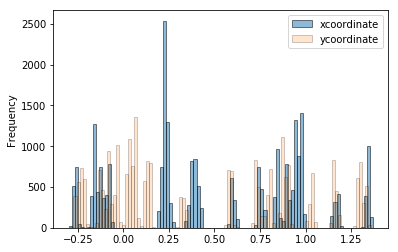

In [318]:
scoots['xcoordinate'].plot(kind='hist',bins=100,ec='black', alpha=.5, legend=True)
scoots['ycoordinate'].plot(kind='hist', bins=100, ec='black', alpha=.2, legend=True)

## There's a strange spike at about .25 on the x axis. We'll need to take a closer look.

In [319]:
import geopandas as gpd
from scipy import ndimage
from shapely.geometry import Point
import matplotlib.pylab as pylab
from geopandas import GeoDataFrame

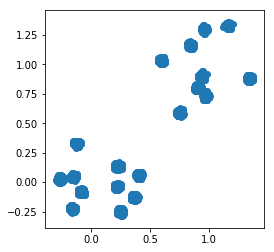

In [323]:
gdf = gpd.GeoDataFrame(scoots, geometry='geometry', crs={'init': 'epsg:4326'})
gdf['geometry'].plot()

## This plot shows that we have two clusters. The gap in between the clusters could represent an untraversable region such as a body of water or a crowded area. Or, the clusters could represent places of recreation where scooters are popular such as a park. 

## We'll probably need a heatmap to get more info. 

In [322]:
scoots["geometry"] = scoots.apply(lambda x: Point(x["xcoordinate"], x["ycoordinate"]), axis = 1)
def heatmap(d, bins=(100,100), smoothing=1.3, cmap='jet'):
    def getx(pt):
        return pt.coords[0][0]

    def gety(pt):
        return pt.coords[0][1]

    x = list(d.geometry.apply(getx))
    y = list(d.geometry.apply(gety))
    heatmap, xedges, yedges = np.histogram2d(y, x, bins=bins)
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]

    logheatmap = np.log(heatmap)
    logheatmap[np.isneginf(logheatmap)] = 0
    logheatmap = ndimage.filters.gaussian_filter(logheatmap, smoothing, mode='nearest')
    
    plt.imshow(logheatmap, cmap=cmap, extent=extent)
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.show()

/Users/alvinalaphat/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


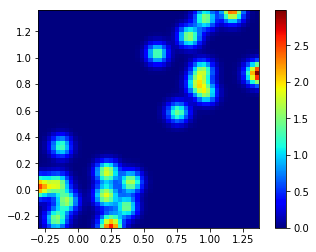

In [121]:
heatmap(gdf, bins=50, smoothing=1.5)

## This heatmap is very good to examine the highly populated areas. We can check out those x coordinates around .25 more closely now. Also, I'm noticing a lot of activity around (1.0,0.8), (-0.25,0.05), (0.25,-0.1), (1.30,0.9).

## Let's evaluate them.

In [188]:
pivot = pd.pivot_table(values=['power_level'], data=scoots, index=['xcoordinate','ycoordinate'])

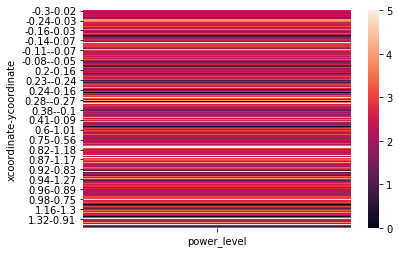

In [189]:
sns.heatmap(pivot)

### This heatmap of the power levels confirms that most scooters in the popular locations are on very low power

### Let's estimate points where these popular locations are centered and see about what % of the data they represent

In [198]:
region1 = len(scoots[(scoots['xcoordinate'] > .2) & (scoots['xcoordinate'] < .3) & (scoots['ycoordinate'] < -.2)])
region2 = len(scoots[(scoots['ycoordinate'] > .7) & (scoots['ycoordinate'] < .9) & (scoots['xcoordinate'] < 1) & (scoots['xcoordinate'] > .8)])
region3 = len(scoots[(scoots['ycoordinate'] > 0) & (scoots['ycoordinate'] < .2) & (scoots['xcoordinate'] < -.2)])
region4 = len(scoots[(scoots['xcoordinate'] > 1.25)])

print('Point: (0.25,-0.1)') 
print(region1, 'scooters', '\n% of Data: ', region1/len(scoots)*100, '%')
print()
print('Point: (1.0,0.8)')
print(region2, 'scooters', '\n% of Data: ', region2/len(scoots)*100, '%')
print()
print('Point: (-0.25,0.05)')
print(region3, 'scooters', '\n% of Data: ', region3/len(scoots)*100, '%')
print()
print('Point: (1.30,0.9)')
print(region4, 'scooters', '\n% of Data: ', region4/len(scoots)*100, '%')

Point: (0.25,-0.1)
1334 scooters 
% of Data:  5.197132616487455 %

Point: (1.0,0.8)
3306 scooters 
% of Data:  12.879850397381954 %

Point: (-0.25,0.05)
1293 scooters 
% of Data:  5.037400654511455 %

Point: (1.30,0.9)
1517 scooters 
% of Data:  5.910082593112046 %


### There are two clusters where scooters get used a lot and the most populated location is (1.0, 0.8) which is in the top right cluster.  

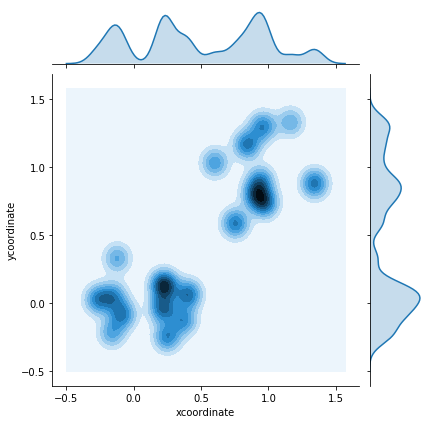

In [47]:
sns.jointplot(x='xcoordinate', y='ycoordinate', data=scoots, kind='kde',)

## While the most popular locations appear to be heavily concentrated around the point (1.0, 0.8), there is a greater spread around the points centered at (0.25, 0) which could also be considered the most popular location. 

Greatest 

In [162]:
pop_region = scoots[(scoots['ycoordinate'] > .7) & (scoots['ycoordinate'] < .9) & (scoots['xcoordinate'] < 1) & (scoots['xcoordinate'] > .8)]
pop_region['power_level'].value_counts()

0    591
4    567
3    552
5    548
1    528
2    520
Name: power_level, dtype: int64

(array([4388.,    0., 4248.,    0., 4245.,    0., 4160.,    0., 4284.,
        4343.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

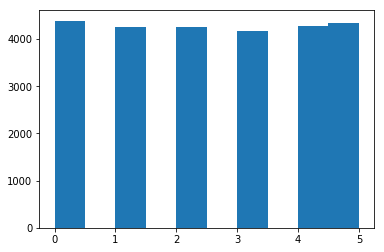

In [177]:
plt.hist(scoots['power_level'])

## There's a fairly uniform distribution of power levels across all locations collectively with slightly more scooters being on zero power.

(array([591.,   0., 528.,   0., 520.,   0., 552.,   0., 567., 548.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

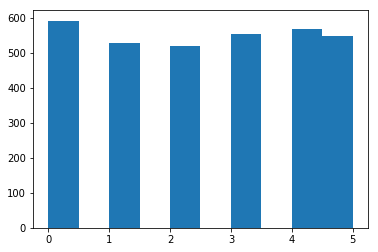

In [184]:
plt.hist(pop_region['power_level'])

## As expected, most scooters in the most popular location have no power. 

# Calculate Operation Time Cost

## Find the distance from the bus station

In [84]:
import numpy as np
def comp_distance(x, y):
    return np.sqrt(((x-(20.19))**2) + ((y-(20.19))**2))

scoots['distance'] = comp_distance(scoots['xcoordinate'],scoots['ycoordinate'])

### It appears that the bus is about the same distance from all the scooters, ranging from 26.76-28.86 miles away, so if the bus travels at 50 mph, it would take between .535-.577 hours to travel to these locations. 

### Since the bus does not need to pick up fully charged scooters, we can ignore those scooters

In [291]:
drained = scoots[scoots['power_level'] != 5].reset_index(drop=True)

In [301]:
def total_time(data):
    op_time = 0
    for x in range(1, len(data)):
        distance = np.sqrt((((data['xcoordinate'][x]) - (data['xcoordinate'][x-1]))**2) + (((data['ycoordinate'][x]) - (data['ycoordinate'][x-1]))**2))
        charge_time = 5 - data['power_level'][x]
        travel_time = distance/50
        op_time = op_time + (charge_time - travel_time)
    return op_time

### Account for time for bus to leave station and arrive at the first scooter

In [312]:
time_to_first = (np.sqrt((((drained['xcoordinate'][0]) - 20.19)**2) + (((drained['ycoordinate'][0]) - 20.19)**2)))/50

print('Operation Time Cost: %.2f'%float(total_time(drained) + time_to_first), 'hours')

Operation Time Cost: 64258.40 hours


## Find the most efficient scooter charging strategy

### To be the most efficient, the bus should go to the scooters closest to the bus station first since it won't be able to charge any scooters on the initial ride over. From there, the bus should go to the scooters nearest to the scooter it was just at, but making sure to stay within one cluster before moving to the next.

In [202]:
scoots[scoots['distance'] == scoots['distance'].min()]

,scooter_id,xcoordinate,ycoordinate,power_level,distance,geometry
2809,2809,1.2,1.34,4,26.757104,POINT (1.20000 1.34000)


### To be the most effective, the bus should go to the most popular locations where most of the scooters are at zero power. Since the most popular location, (1.0, 0.8), is in the top right cluster, the bus should travel to the top right cluster first. After picking up all the scooters in that region, the bus should then go to the next popular location in that cluster, continuing until all the scooters in one cluster have been taken care of. After that, the bus should start with the most popular locations in the bottom right cluster, (-0.25,0.05) and (0.25,-0.1), and continue the process. 

## I look forward to hearing back from you. Feel free to reach out to me if you have any questions.